# Convolution Neural Network

The Convolutional Neural Network gained popularity through its use with image data, and is currently the state of the art for detecting what an image is, or what is contained in the image.

### LOADING CIFAR-10 DATASET ALONG WITH NECESSARY LIBS

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping

import os
import numpy as np
import matplotlib.pyplot as plt

#### X_train -> train images
#### Y_train -> train labels
#### X_test  -> test images
#### Y_test  -> test labels

In [63]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


Class name list

In [64]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [65]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

Number of epochs

In [66]:
e = 100

In [67]:
v = 0

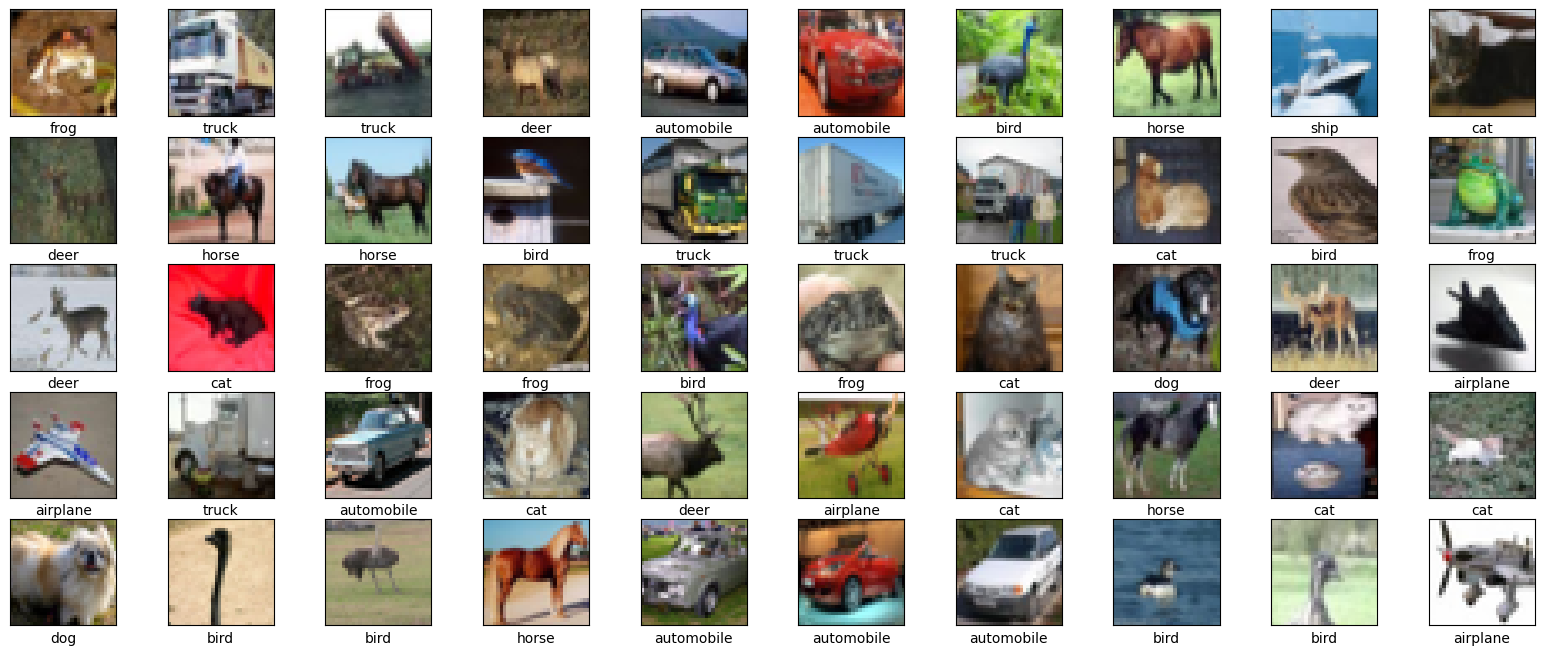

In [68]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
    
plt.show()

## Model using preprosessing

### Preprosing the images (keeping the values between 0 and 1)

In [69]:
X_train, X_test = X_train / 255.0, X_test / 255.0

### Model creation using L1 regulariser

In [70]:
model_l1 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l1(0.01), input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.5), padding ="same", kernel_regularizer=regularizers.l1(0.05)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l1(0.01)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.5), padding ="same", kernel_regularizer=regularizers.l1(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l1(0.05)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.5), padding ="same", kernel_regularizer=regularizers.l1(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])
model_l1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

#### Using ADAM as optimizer

In [71]:
model_l1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Training the model

In [72]:
h = model_l1.fit(x=X_train, y=Y_train, epochs=e, validation_split=0.2, batch_size=128, callbacks=[early_stop], verbose =v)

Restoring model weights from the end of the best epoch: 9.
Epoch 19: early stopping


### Graph Plotting

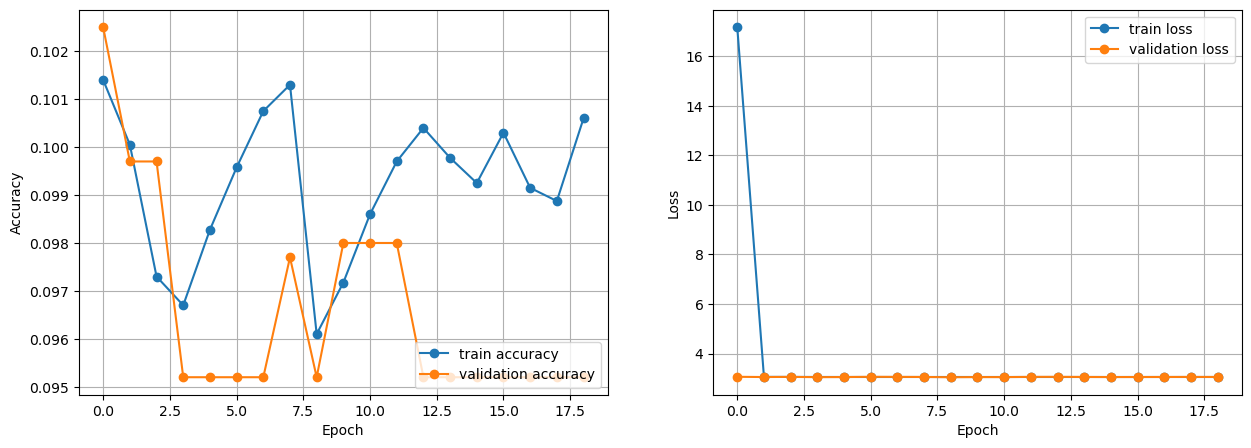

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### Testing the accuracy with test data

In [74]:
test_loss, test_acc = model_l1.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 3.0458 - accuracy: 0.1000

Test Accuracy: 0.10000000149011612

Test Loss: 3.045762062072754


In [75]:
predictions = model_l1.predict(X_test)
np.argmax(predictions[0])

313/313 [==============================] - 1s 2ms/step


2

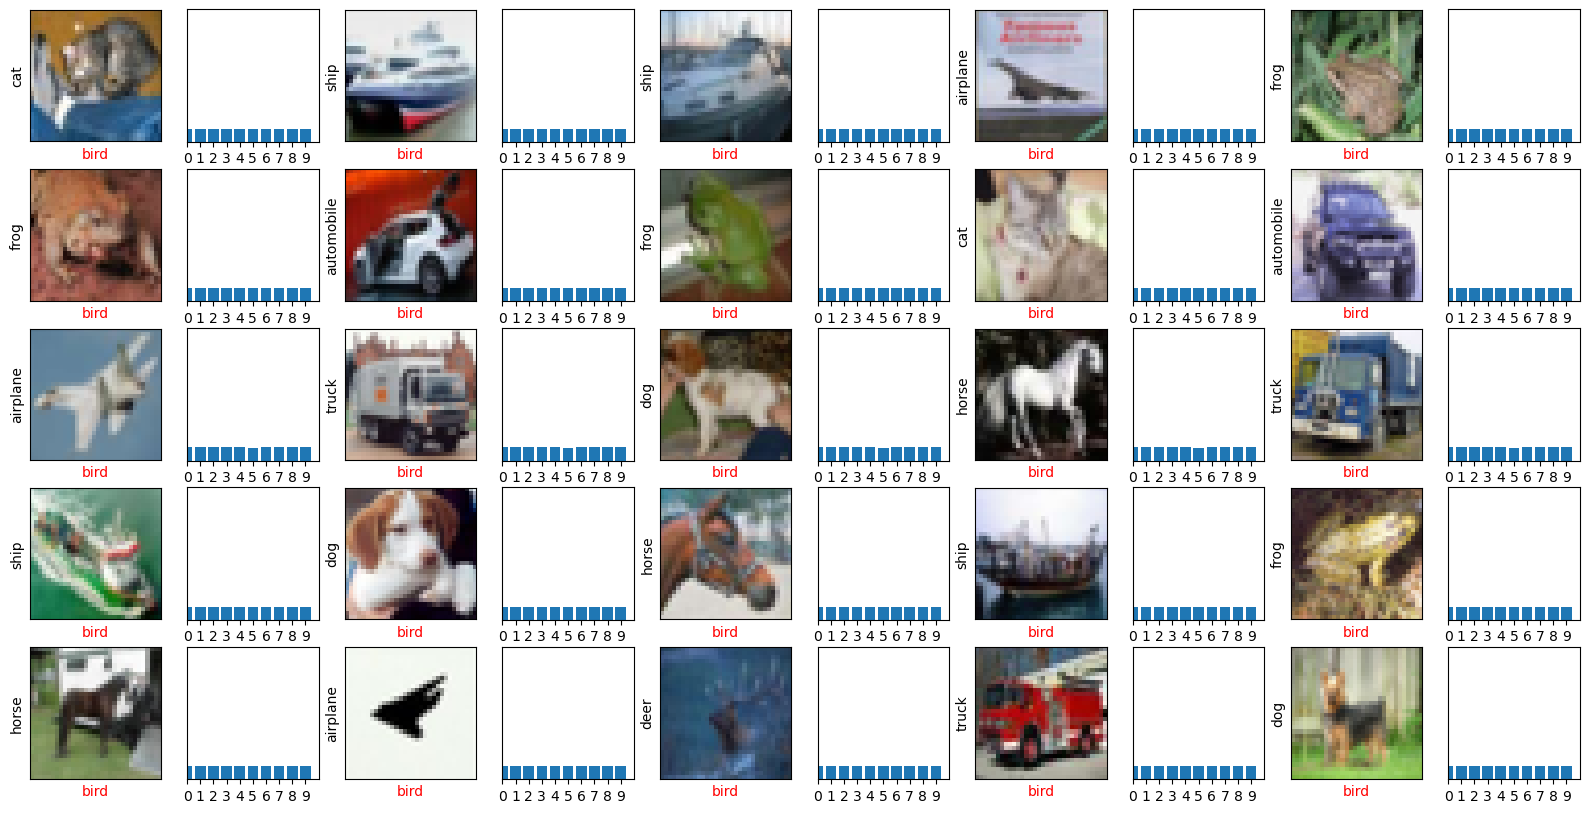

In [76]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

#### Using SGD as optimizer

In [77]:
model_l1 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l1(0.01), input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.5), padding ="same", kernel_regularizer=regularizers.l1(0.05)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l1(0.01)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.5), padding ="same", kernel_regularizer=regularizers.l1(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l1(0.05)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.5), padding ="same", kernel_regularizer=regularizers.l1(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])
model_l1.summary()

model_l1.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

Training the model

In [78]:
h = model_l1.fit(x=X_train, y=Y_train, epochs=e, validation_split=0.2, batch_size=128, verbose =v, callbacks=[early_stop])

Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping


### Graph plotting

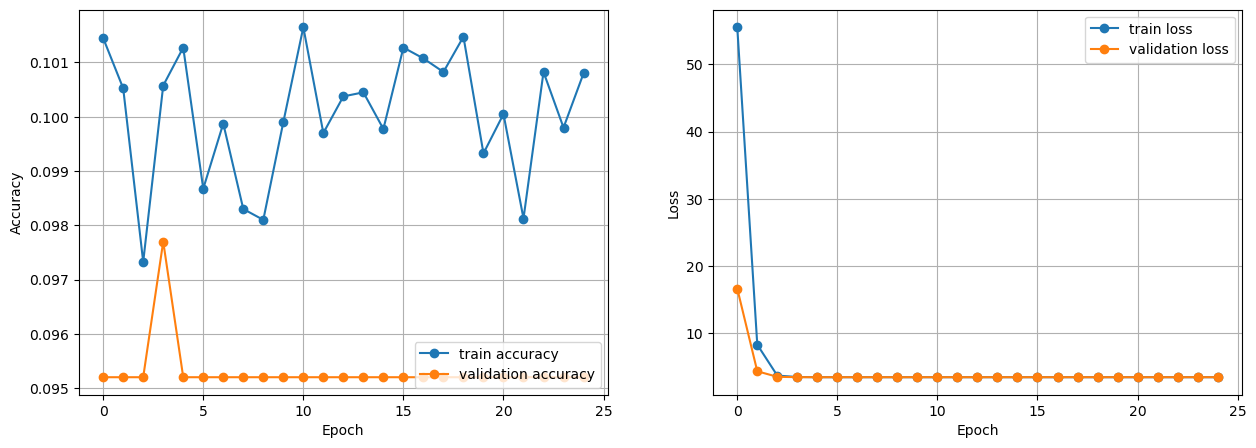

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### Testing the accuracy with test data

In [80]:
test_loss, test_acc = model_l1.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 3.4384 - accuracy: 0.1000

Test Accuracy: 0.10000000149011612

Test Loss: 3.438401222229004


In [81]:
predictions = model_l1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [82]:
np.argmax(predictions[0])

2

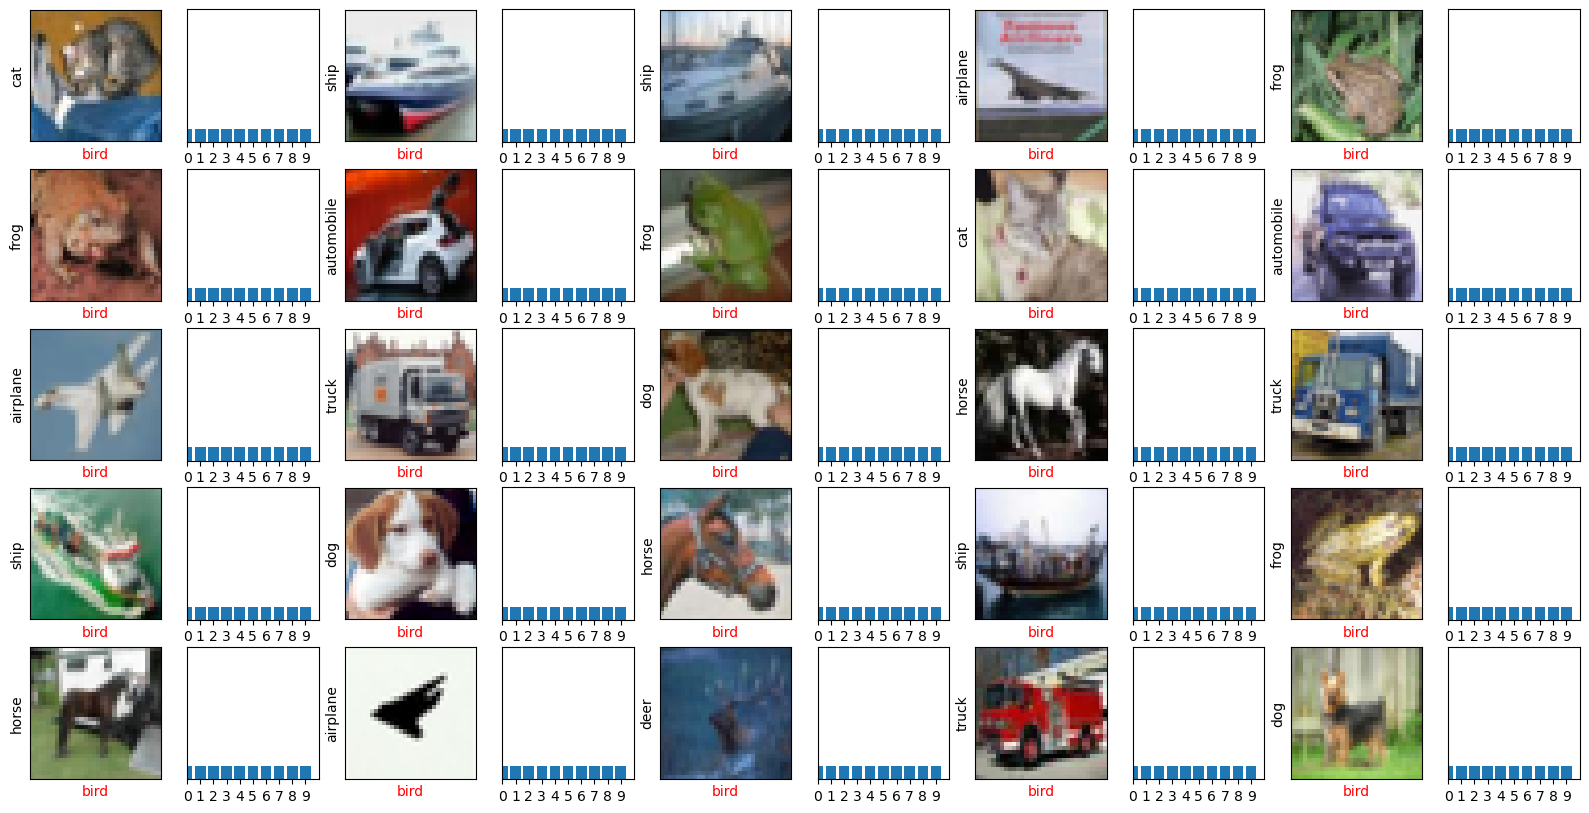

In [83]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()


### Using RMSPROP as optimiser

In [84]:
model_l1 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l1(0.01), input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.5), padding ="same", kernel_regularizer=regularizers.l1(0.05)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l1(0.01)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.5), padding ="same", kernel_regularizer=regularizers.l1(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l1(0.05)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.5), padding ="same", kernel_regularizer=regularizers.l1(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])
model_l1.summary()

model_l1.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_57 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

Training the model

In [85]:
h = model_l1.fit(x=X_train, y=Y_train, epochs=e, validation_split=0.2, verbose =v, batch_size=128, callbacks=[early_stop])

Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping


### Graph plotting

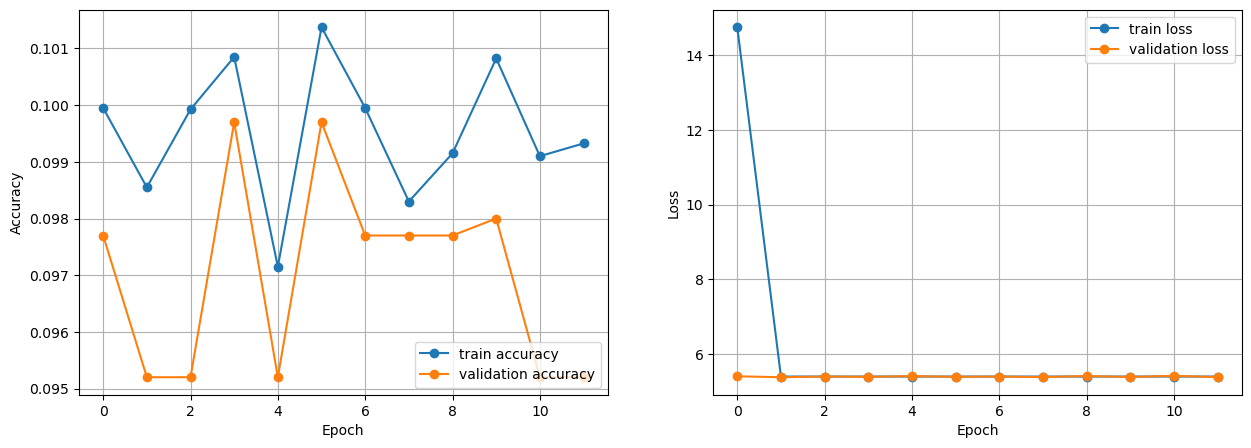

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### Testing the accuracy with test data

In [87]:
test_loss, test_acc = model_l1.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 5.3750 - accuracy: 0.1000

Test Accuracy: 0.10000000149011612

Test Loss: 5.374979019165039


In [88]:
predictions = model_l1.predict(X_test)
np.argmax(predictions[0])

313/313 [==============================] - 1s 2ms/step


2

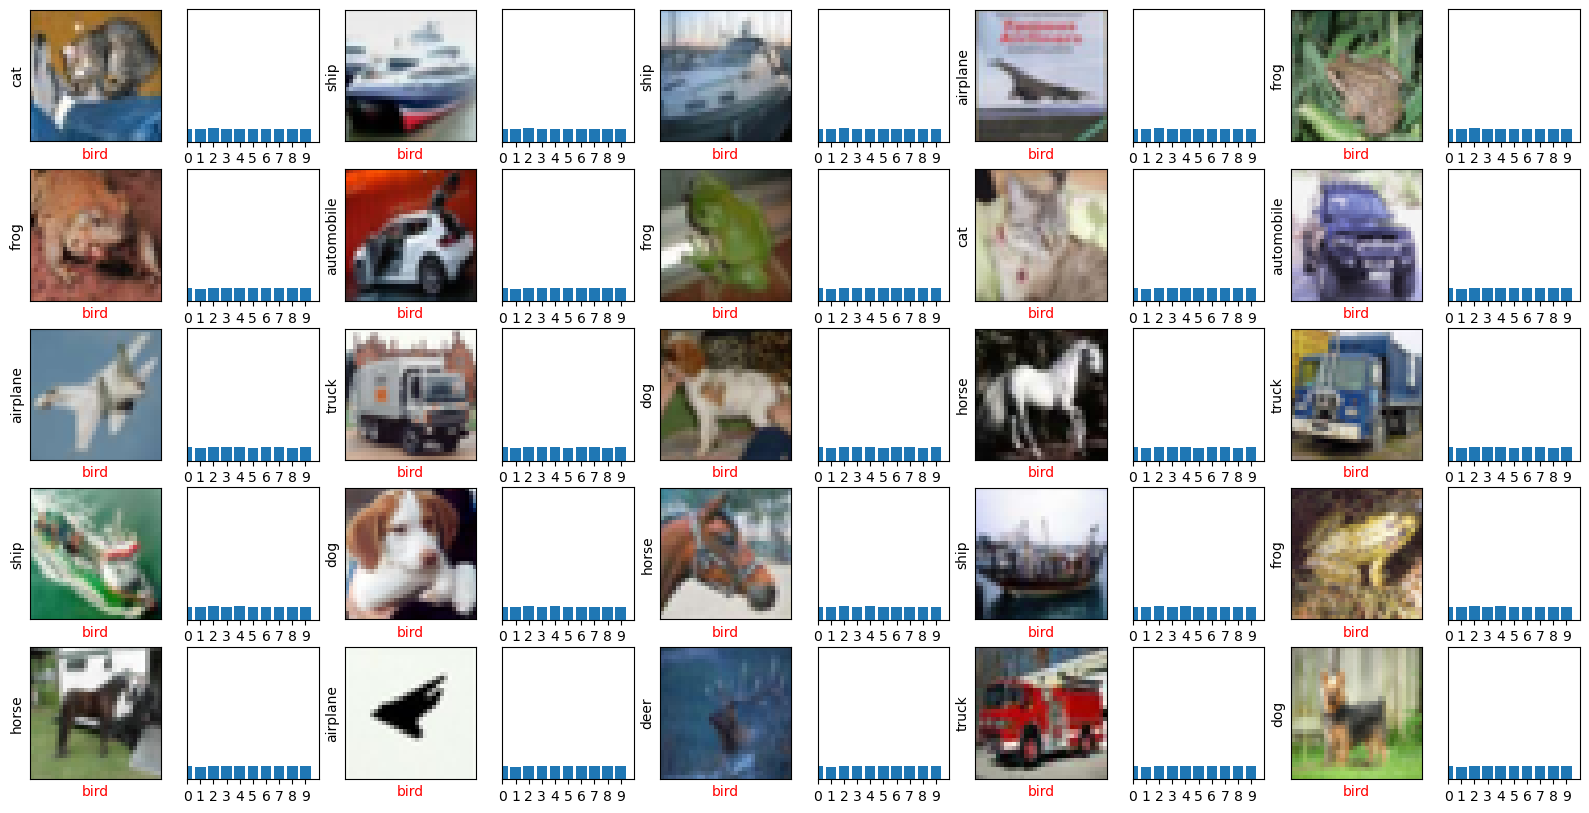

In [89]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()


In [90]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

## Using L2 regularizer

In [91]:
model_l2 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01), input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])
model_l2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_61 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_63 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

### Using ADAM Optimiser

In [92]:
model_l2.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Training the model

In [93]:
h = model_l2.fit(x=X_train, y=Y_train, epochs=e, validation_split=0.2, verbose =v, batch_size=128, callbacks=[early_stop])

Restoring model weights from the end of the best epoch: 64.
Epoch 74: early stopping


### Graph plotting

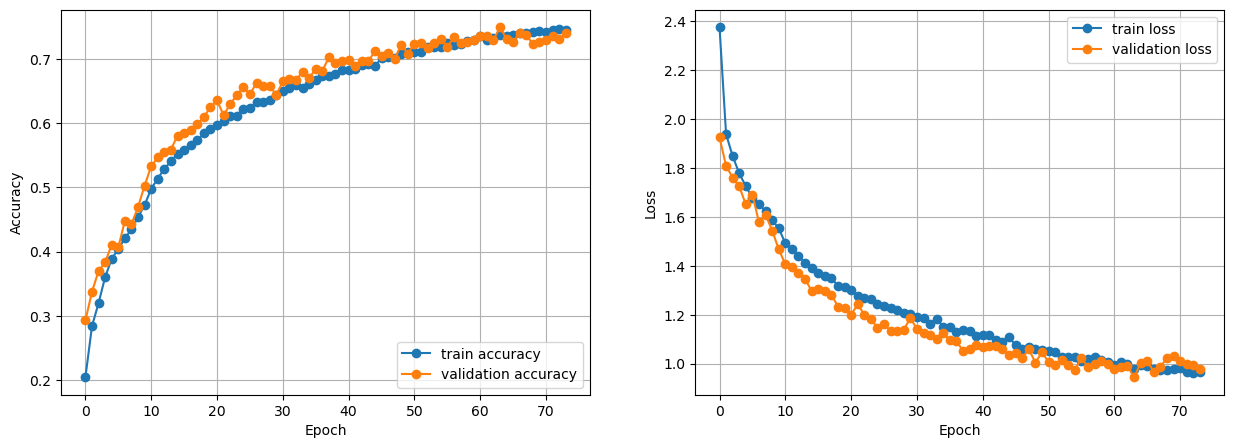

In [94]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### Testing the accuracy with test data

In [95]:
test_loss, test_acc = model_l2.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.9578 - accuracy: 0.7448

Test Accuracy: 0.7447999715805054

Test Loss: 0.957832396030426


In [96]:
predictions = model_l2.predict(X_test)
np.argmax(predictions[0])

313/313 [==============================] - 1s 2ms/step


3

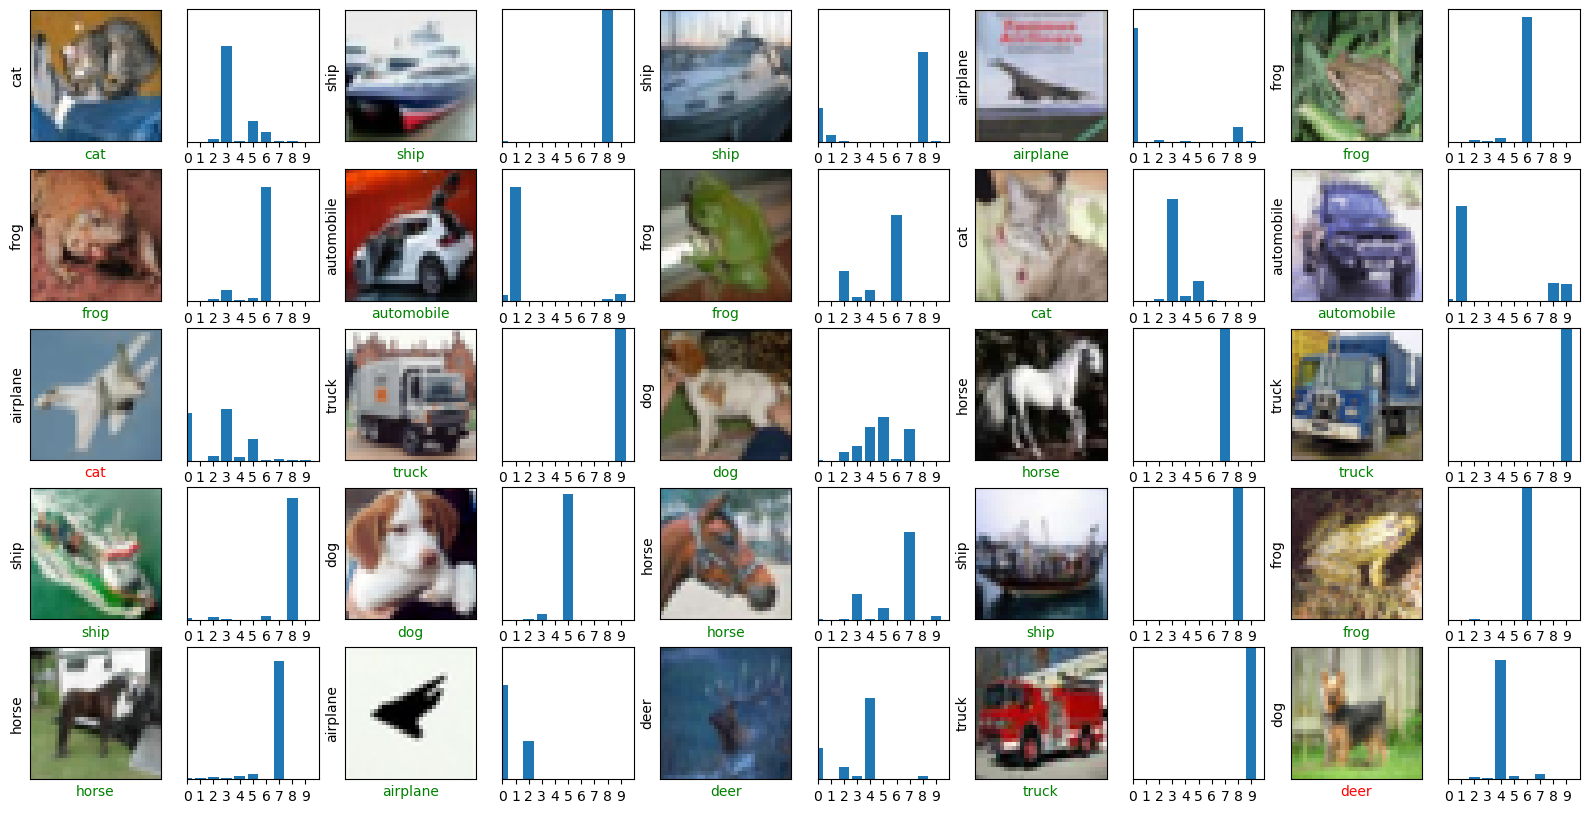

In [97]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()


### Using SGD Optimiser

In [98]:
model_l2 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01), input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])
model_l2.summary()

model_l2.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_67 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_69 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

Training the model

In [99]:
h = model_l2.fit(x=X_train, y=Y_train, epochs=e, validation_split=0.2, verbose =v, batch_size=128, callbacks=[early_stop])

### Graph Plotting

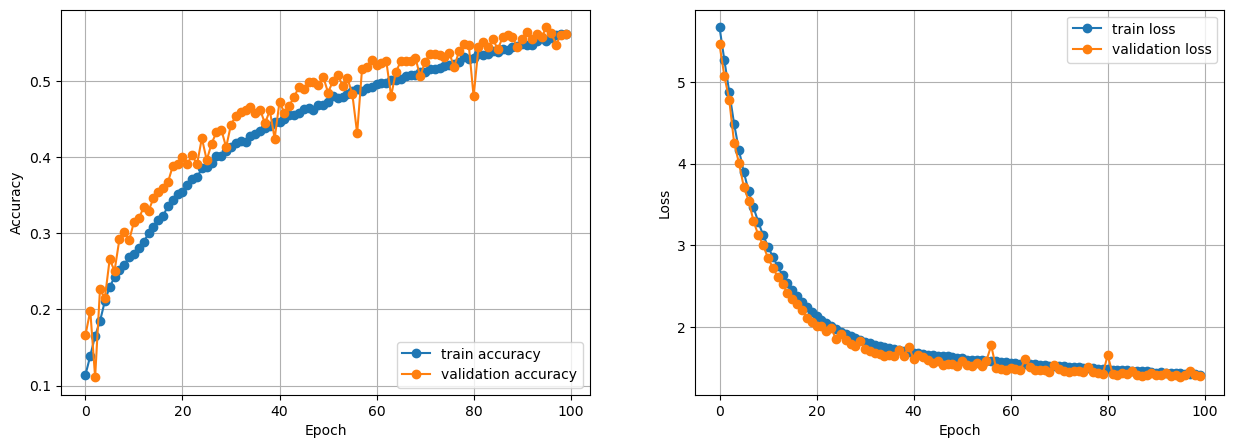

In [100]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### Testing the accuracy with test data

In [101]:
test_loss, test_acc = model_l2.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 1.3956 - accuracy: 0.5595

Test Accuracy: 0.559499979019165

Test Loss: 1.3955533504486084


In [102]:
predictions = model_l2.predict(X_test)
np.argmax(predictions[0])

313/313 [==============================] - 1s 3ms/step


8

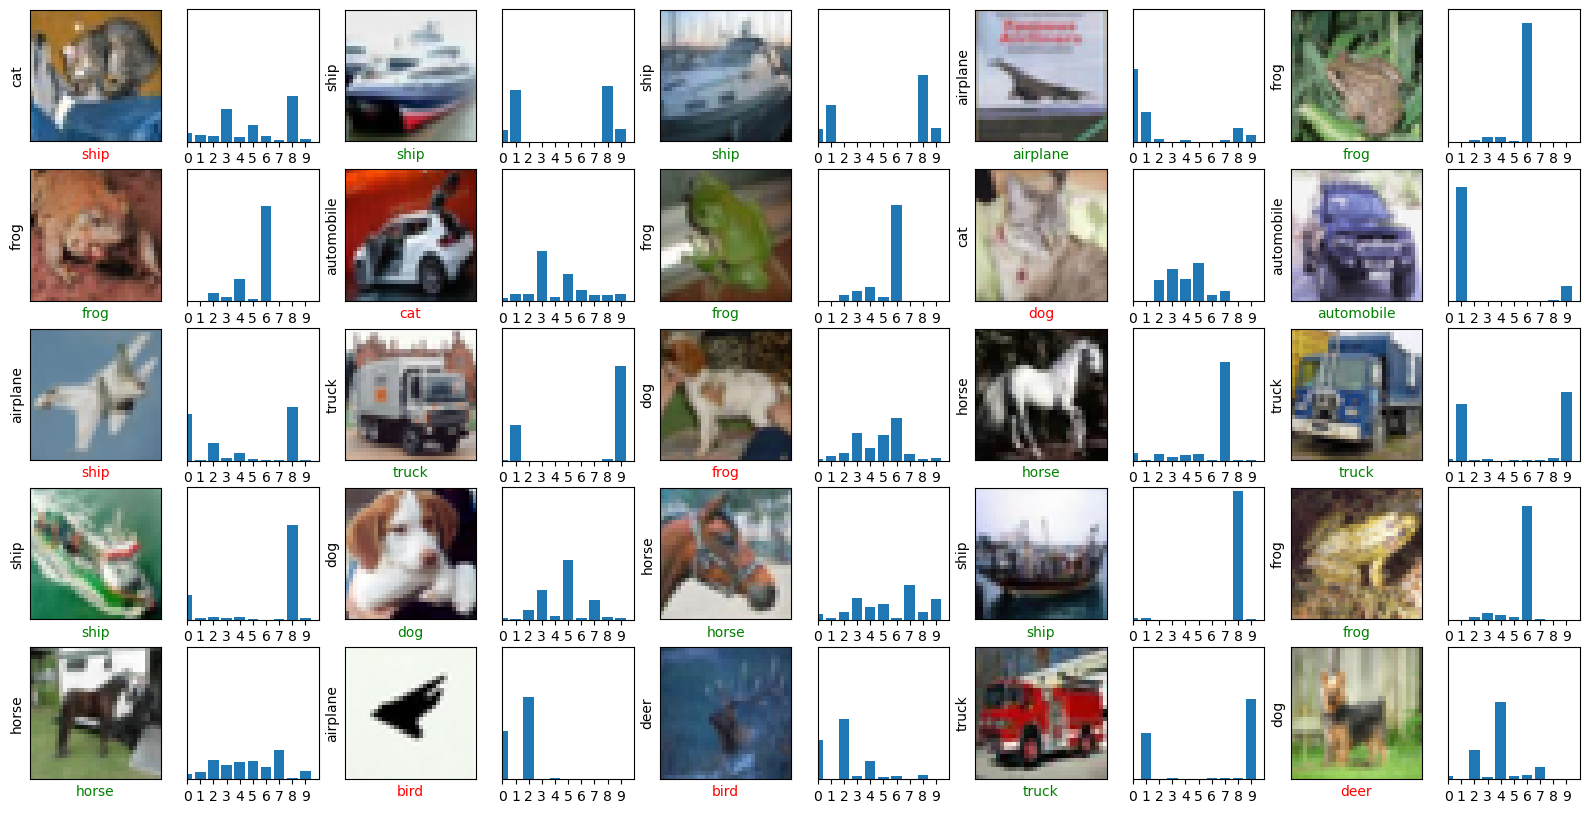

In [103]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()


### Using RMSPROP Optimiser

In [104]:
model_l2 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01), input_shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding ="same", kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])
model_l2.summary()

model_l2.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_75 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

Training the model

In [105]:
h = model_l2.fit(x=X_train, y=Y_train, epochs=e, validation_split=0.2, verbose =v,batch_size=128, callbacks=[early_stop])

Restoring model weights from the end of the best epoch: 80.
Epoch 90: early stopping


### Graph Plotting

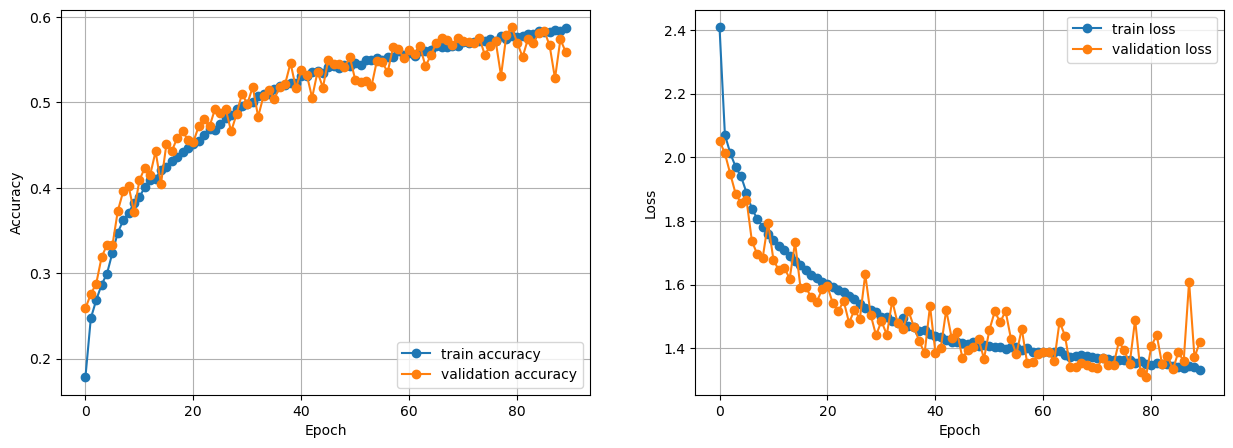

In [106]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### Testing the accuracy with test data

In [107]:
test_loss, test_acc = model_l2.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 1.3139 - accuracy: 0.5871

Test Accuracy: 0.5871000289916992

Test Loss: 1.3138686418533325


In [108]:
predictions = model_l2.predict(X_test)
np.argmax(predictions[0])

313/313 [==============================] - 1s 2ms/step


3

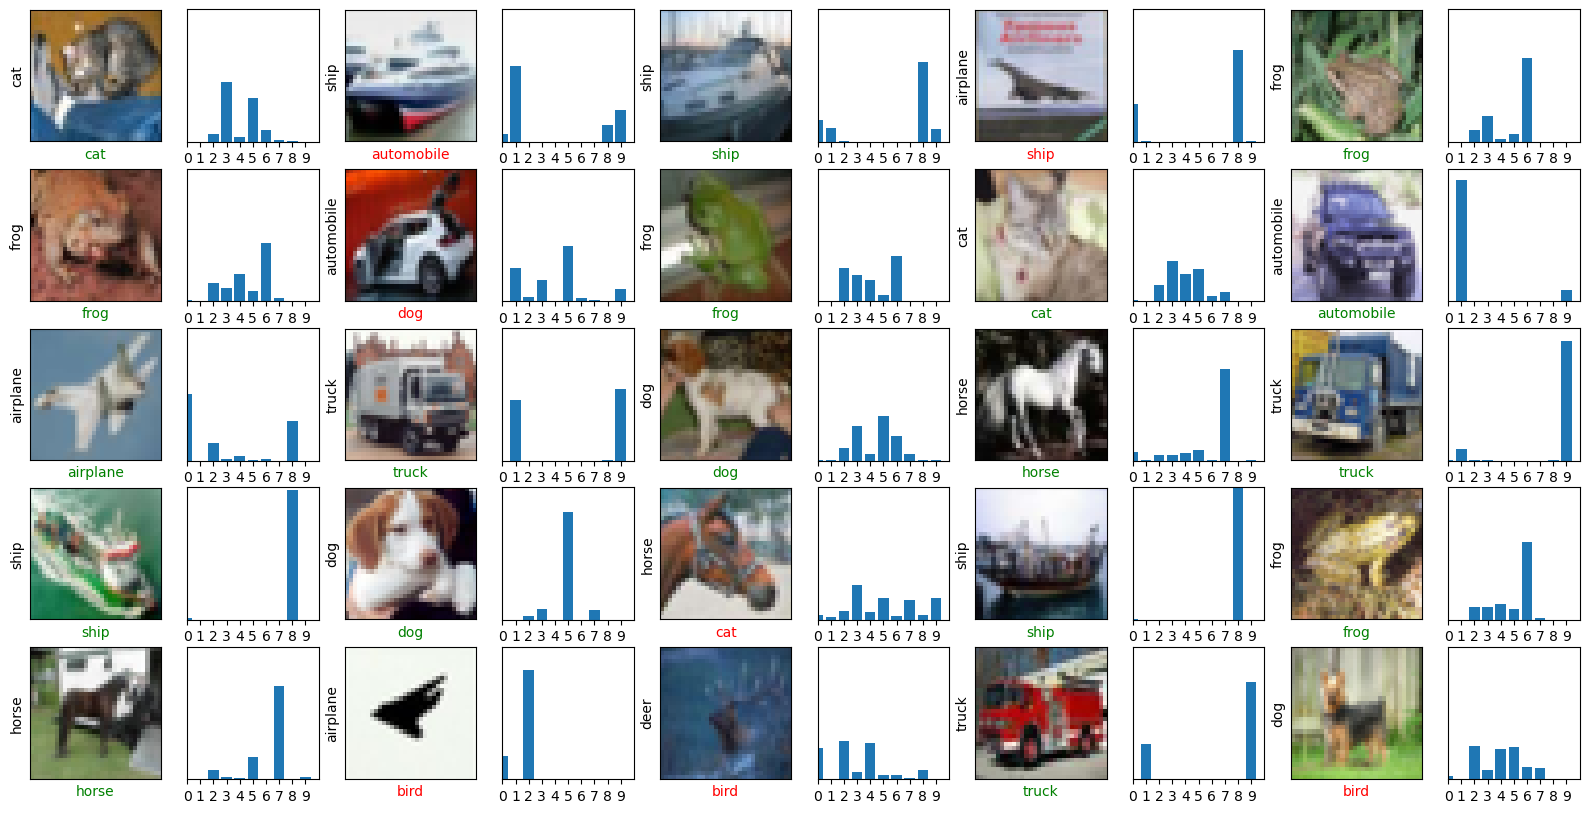

In [109]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

## Conclusion
After analyzing the search results, the conclusion is that L2 regularization with SGD optimizer is the best solution when overfitting is a concern, even with 100 epochs. On the other hand, if accuracy is the main focus, L2 regularization with Adam optimizer is the best combination, even with 64 epochs. However, it is possible to increase the accuracy without early stopping if a specific omega val_loss was used instead of the default value from TensorFlow for the L2 with Adam combination. For L2 with SGD, it's possible to increase the accuracy by increasing the epoch. Therefore, the choice of optimizer and regularization technique depends on the specific needs of the model.